<a href="https://colab.research.google.com/github/weiyunna/Deep-Learning-with-Tensorflow/blob/master/Build_an_image_input_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load images with `tf.data`

* This tutorial provides a simple example of how to load an image dataset using tf.data.

* The dataset used in this example is distributed as directories of images, with one class of image per directory.

## Set up

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Download and Inspect the dataset

### Retrieve the Images

Before you start any training, you'll need a set of images to teach the network about the new classes you want to recognize. We've created an archive of creative-commons licensed flower photos to use initially.

In [4]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

/root/.keras/datasets/flower_photos


In [5]:
data_root_orig

'/root/.keras/datasets/flower_photos'

In [6]:
data_root

PosixPath('/root/.keras/datasets/flower_photos')

After downloading 218MB, you should now have a copy of the flower photos available:

In [7]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))

In [9]:
all_image_paths[0]

PosixPath('/root/.keras/datasets/flower_photos/roses/1813435848_7852708394_n.jpg')

In [51]:
all_image_paths=[str(path) for path in all_image_paths]
all_image_paths[0]
len(all_image_paths)

3670

### Inspect the images

Now let's have a quick look at a couple of the images, so we know what we're dealing with:

In [0]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [0]:
attributions

In [0]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

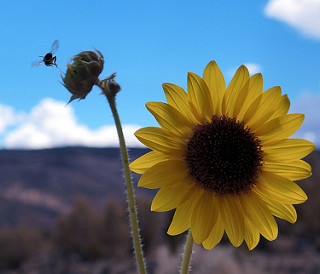

Image (CC BY 2.0)  by Mike Lewinski



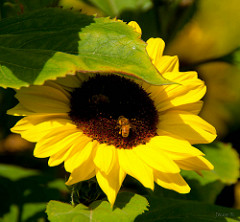

Image (CC BY 2.0)  by Jocelyn Kinghorn



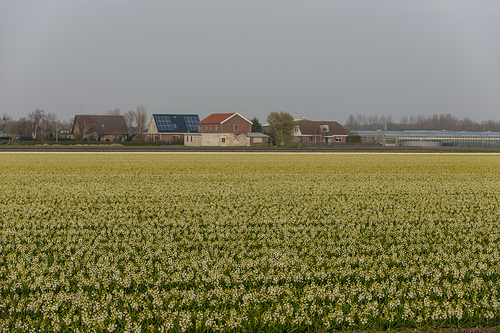

Image (CC BY 2.0)  by nikontino



In [13]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [14]:
attributions[str(pathlib.Path('/root/.keras/datasets/flower_photos/roses/1813435848_7852708394_n.jpg').relative_to(data_root))].split(' - ')

[' by Liam Moloney', 'https://www.flickr.com/photos/tir_na_nog/1813435848/\n']

### Determine the Label for each image

List the available labels

In [15]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [0]:
for item in data_root.glob('*/*'): 
    print(item.name)

In [17]:
for item in data_root.glob('*/'):
  print(item.name)

LICENSE.txt
roses
dandelion
daisy
sunflowers
tulips


Assign an index to each label:

In [18]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [19]:
for item in enumerate(label_names):
  print(item)

(0, 'daisy')
(1, 'dandelion')
(2, 'roses')
(3, 'sunflowers')
(4, 'tulips')


Create a list of every file, and its label index

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

In [21]:
pathlib.Path('/root/.keras/datasets/flower_photos/roses/1813435848_7852708394_n.jpg').parent.name

'roses'

In [0]:
all_image_labels

In [22]:
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### Load and Format the images

TensorFlow includes all the tools you need to load and process images:

In [23]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/roses/1813435848_7852708394_n.jpg'

here is the raw data:

In [24]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


Decode it into an image tensor:

In [25]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(244, 320, 3)
<dtype: 'uint8'>


Resize it for your model:

In [26]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


Wrap up these up in simple functions for later.

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

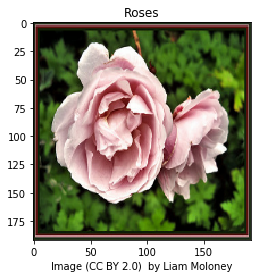

In [29]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [30]:
label = all_image_labels[0]
label

2

## Build a tf.data.Dataset

### A dataset of images

The easiest way to build a tf.data.Dataset is using the `from_tensor_slices ` method.

Slicing the array of strings, results in a dataset of strings:

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
for item in path_ds:
  print (item)

The **shapes** and **types** describe the content of each item in the dataset. In this case it is a set of scalar binary-strings

In [32]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


Now create a new dataset that loads and formats images on the fly by mapping preprocess_image over the dataset of paths.

In [0]:
# create a 'ParallelMapDataset' object
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [0]:
for item in image_ds:
  print(item)

In [0]:
for n in (enumerate(image_ds.take(4))):
  print(len(n))

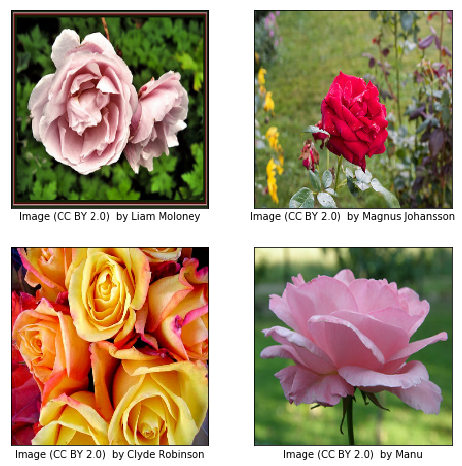

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))

### A dataset of (image,label) pairs

Using the same **from_tensor_slices** method we can build a dataset of labels

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [46]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

roses
roses
roses
roses
roses
roses
roses
roses
roses
roses


Since the datasets are in the same order we can just zip them together to get a dataset of (image, label) pairs.

In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

The new dataset's shapes and types are tuples of shapes and types as well, describing each field:

In [48]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


Note: When you have arrays like all_image_labels and all_image_paths an alternative to tf.data.dataset.Dataset.zip is to slice the pair of arrays.

In [49]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

### Basic methods of training

To train a model with this dataset you will want the data:

* To be well shuffled.
* To be batched.
* To repeat forever.
* Batches to be available as soon as possible.

These features can be easily added using the tf.data api.

In [52]:
BATCH_SIZE = 32
image_count=3670
# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

There are a few things to note here:

The order is important.

* A .`shuffle` before a .`repeat` would shuffle items across epoch boundaries (some items will be seen twice before others are seen at all).
* A `.shuffle` after a `.batch` would shuffle the order of the batches, but not shuffle the items across batches.
* We use a buffer_size the same size as the dataset for a full shuffle. Up to the dataset size, large values provide better randomization, but use more memory.
* The shuffle buffer is filled before any elements are pulled from it. So a large buffer_size may cause a delay when your Dataset is starting.

* The shuffeled dataset doesn't report the end of a dataset until the shuffle-buffer is completely empty. The Dataset is restarted by .repeat, causing another wait for the shuffle-buffer to be filled.

This last point can be addressed by using the `tf.data.Dataset.apply `method with the fused `tf.data.experimental.shuffle_and_repeat` function:

In [53]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

### Pipe the dataset to the model

* Fetch a copy of MobileNet v2 from `tf.keras.applications.`

* This will be used for a simple transfer learning example.

* Set the MobileNet weights to be `non-trainable:`

In [54]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 1s 0us/step


This model expects its input to be normalized to the [-1,1] range:

In [56]:
help(tf.keras.applications.mobilenet_v2.preprocess_input)

Help on function wrapper in module tensorflow.python.keras.applications:

wrapper(*args, **kwargs)



In [0]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

The MobileNet returns a 6x6 spatial grid of features for each image.

Pass it a batch of images to see:

In [0]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [59]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


So build a model wrapped around MobileNet, and use `tf.keras.layers.GlobalAveragePooling2D` to average over those space dimensions, before the output` tf.keras.layers.Dense layer`:

In [0]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

Now it produces outputs of the expected shape:

In [61]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -2.336307
max logit: 3.3181067

Shape: (32, 5)


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

There are 2 trainable variables: the Dense weights and bias

In [63]:
len(model.trainable_variables)

2

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


Train the model.

Normally you would specify the real number of steps per epoch, but for demonstration purposes only run 3 steps

In [65]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [66]:
model.fit(ds, epochs=1, steps_per_epoch=3)

3/3 [==============================] - 21s 7s/step - loss: 6.6859 - accuracy: 0.3125
